<a href="https://colab.research.google.com/github/bublaiSAURUS/Machine_Learning1/blob/main/ProjectCaseStudy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
df.head()

,National Waterways- I,National Waterways- II,National Waterways-III
YEAR,,,
2003-04,1596,296,219
2004-05,3119,381,154
2005-06,4109,322,169
2006-07,5803,1728,149
2007-08,7092,422,89


In [ ]:
df.columns

Index(['National Waterways- I', 'National Waterways- II',
       'National Waterways-III'],
      dtype='object')

In [ ]:
mu = df.mean()
sigma = df.std()
Z = (df - mu)/sigma

In [ ]:
Z

,National Waterways- I,National Waterways- II,National Waterways-III
YEAR,,,
2003-04,-1.357385,-0.509611,2.223674
2004-05,-1.080443,-0.316623,0.445232
2005-06,-0.900421,-0.450579,0.855642
2006-07,-0.592385,2.741661,0.308429
2007-08,-0.357993,-0.223535,-1.333210
2008-09,-0.362357,-0.859259,-0.785997
2009-10,0.243897,-1.013649,-1.114324
2010-11,0.589393,0.119301,0.116905
2011-12,0.997441,0.210119,-0.156702


In [ ]:
c = Z.cov()

In [ ]:
c

,National Waterways- I,National Waterways- II,National Waterways-III
National Waterways- I,1.000000,0.067539,-0.503297
National Waterways- II,0.067539,1.000000,0.117528
National Waterways-III,-0.503297,0.117528,1.000000


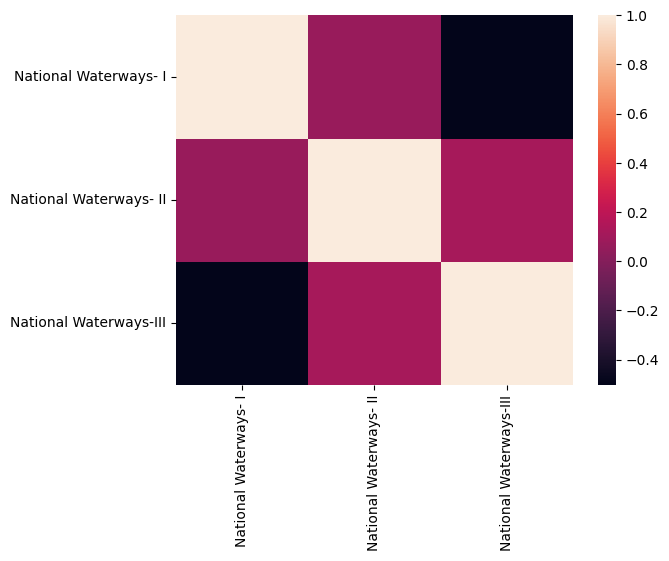

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

In [ ]:
eval, evec = np.linalg.eig(c)

In [ ]:
eval

array([0.46464269, 1.50585311, 1.02950421])

In [ ]:
evec

array([[ 0.68104775, -0.69862258,  0.21931815],
       [-0.23794521,  0.07211197,  0.96859793],
       [ 0.69249984,  0.71184714,  0.1171222 ]])

In [ ]:
index = eval.argsort()[::-1]
eval = eval[index]
evec = evec[:,index]

In [ ]:
eval

array([1.50585311, 1.02950421, 0.46464269])

In [ ]:
evec

array([[-0.69862258,  0.21931815,  0.68104775],
       [ 0.07211197,  0.96859793, -0.23794521],
       [ 0.71184714,  0.1171222 ,  0.69249984]])

In [ ]:
retained_variance = np.cumsum(eval) / np.sum(eval)

In [ ]:
retained_variance

array([0.50195104, 0.8451191 , 1.        ])

In [ ]:
u = evec[:,:np.argmax(retained_variance > 0.50) + 1]

In [ ]:
u

array([[-0.69862258],
       [ 0.07211197],
       [ 0.71184714]])

In [ ]:
pca_component = pd.DataFrame(u, index =['National Waterways- I','National Waterways- II','National Waterways-III'],columns = ['PC1'])

In [ ]:
pca_component

,PC1
National Waterways- I,-0.698623
National Waterways- II,0.072112
National Waterways-III,0.711847


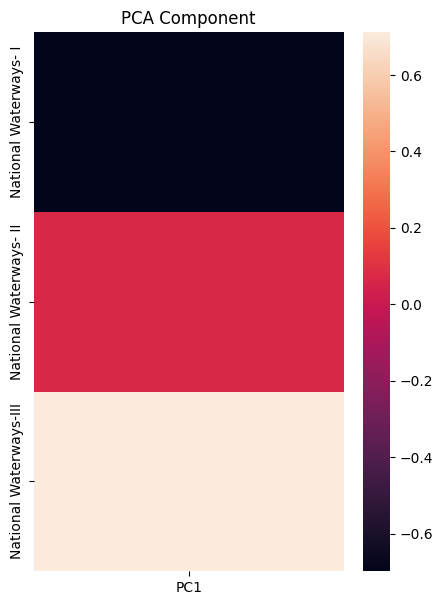

In [ ]:
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [ ]:
pca_val = Z @ pca_component

In [ ]:
pca_val

,PC1
YEAR,
2003-04,2.494467
2004-05,1.048927
2005-06,1.205649
2006-07,0.831114
2007-08,-0.715059
2008-09,-0.368321
2009-10,-1.036717
2010-11,-0.319942
2011-12,-0.793231
